# Logistic Regression

## Importing the libraries

In [80]:
# Import the numpy library and alias it as 'np'
import numpy as np

# Import the pandas library and alias it as 'pd'
import pandas as pd

# Import the matplotlib.pyplot module and alias it as 'plt'
import matplotlib.pyplot as plt

## Importing the dataset

In [81]:
# Load a dataset from a CSV file named "Social_Network_Ads.csv" into a Pandas DataFrame and assign it to the variable 'dataset'
dataset = pd.read_csv("Social_Network_Ads.csv")

# Extract the feature data (independent variables) from the 'dataset' by selecting all rows and all columns except the last one and store it in 'x'
x = dataset.iloc[:, :-1].values

# Extract the target data (dependent variable) from the 'dataset' by selecting all rows and only the last column and store it in 'y'
y = dataset.iloc[:, -1].values

In [82]:
# Display the first few rows of the 'dataset' using the 'head()' method to get a quick overview of the data
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [83]:
# Import the 'train_test_split' function for data splitting
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

## Feature Scaling

In [84]:
# Import the 'StandardScaler' class from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
sc = StandardScaler()

# Scale (normalize) the feature data in the training and testing sets separately
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Training the Logistic Regression model on the Training set

In [85]:
# Import the 'LogisticRegression' class from scikit-learn for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression classifier with a specified random state
classifier = LogisticRegression(random_state=0)

# Fit the classifier to the training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [86]:
# Predict the outcome using the trained classifier on a new data point after scaling it
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the Test set results

In [87]:
# Predict the target values (y) using the trained classifier on the test data
y_pred = classifier.predict(x_test)

# Display the actual and predicted values for comparison, concatenating them horizontally
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [88]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a confusion matrix to evaluate the model's performance on the test data
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate and print the accuracy score of the model's predictions
score = accuracy_score(y_test, y_pred)
print(score)

[[63  5]
 [ 8 24]]
0.87


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


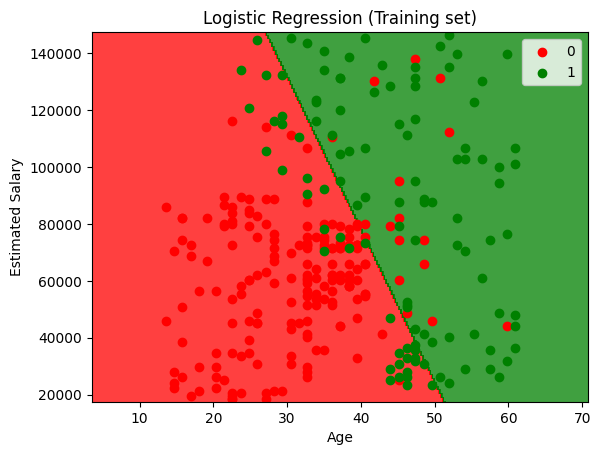

In [89]:
# Import necessary components for creating a visualization
from matplotlib.colors import ListedColormap

# Inverse transform the scaled training data to its original scale for visualization
X_set, y_set = sc.inverse_transform(x_train), y_train

# Create a grid of points for making contour plots
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))

# Plot the contour representing the decision boundary of the logistic regression classifier
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the original training data points, color-coded by class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

# Set plot title and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


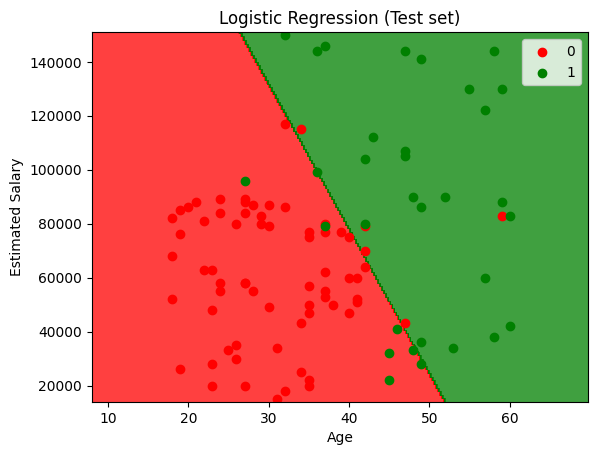

In [91]:
# Import necessary components for creating a visualization
from matplotlib.colors import ListedColormap

# Inverse transform the scaled test data to its original scale for visualization
X_set, y_set = sc.inverse_transform(x_test), y_test

# Create a grid of points for making contour plots
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))

# Plot the contour representing the decision boundary of the logistic regression classifier on the test data
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the original test data points, color-coded by class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

# Set plot title and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()